In [1]:
from scipy import stats
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Wczytujemy dane zgromadzone podczas eksperymentu

In [2]:
abtest_df = pd.read_json("data/abtest.jsonl", orient="records", lines=True)

In [3]:
def assigned_group(uid):
    return uid % 2

In [4]:
abtest_df["group"] = assigned_group(abtest_df["user_id"].astype('int'))
a = abtest_df[(abtest_df["group"] == 0) & (abtest_df["event_type"] == "BUY_PRODUCT")]["offered_discount"].astype('int').values
b = abtest_df[(abtest_df["group"] == 1) & (abtest_df["event_type"] == "BUY_PRODUCT")]["offered_discount"].astype('int').values

Liczymy wyniki dla każdej "próbki" - w tym wypadku jest to stosunek zaoferowanej ceny do pełnej ceny, im większy tym lepiej

In [5]:
a = 1 - 0.01*a
b = 1 - 0.01*b

Sprawdzamy jaki rozkład ma wynik. Jeśli będzie miał rozkład normalny możemy użyć testu t-Studenta. Jeśli nie ma to zostaje nam zwykłe porównanie średnich wartości, ale test również można spróbować przeprowadzić.

Żeby uzyskać prawdziwy rozkład potrzeba prawdziwych użytkowników. Tylko oni wygenerują nowe zdarzenia, które będą zgodne z ich zachowaniem. W tym przypadku zostały sztucznie wygenerowane oczywiste przypadki.

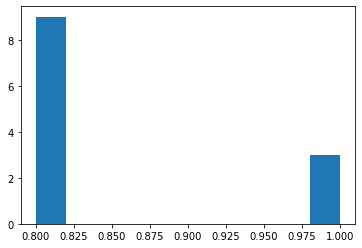

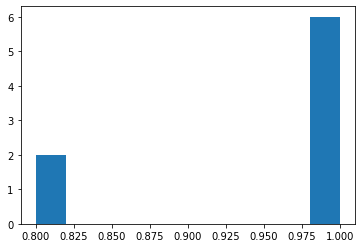

In [6]:
plt.figure()
_ = plt.hist(a)
plt.figure()
_ = plt.hist(b)

Wyliczamy wartości testu

In [7]:
mu_a = np.mean(a)
mu_b = np.mean(b)

print("Mean score for A: ", mu_a)
print("Mean score for B: ", mu_b)

Mean score for A:  0.85
Mean score for B:  0.95


In [8]:
Tscore, pvalue = stats.ttest_ind(b, a)
print("Tscore is: ", Tscore)
print("pvalue is: ", pvalue)

Tscore is:  2.4
pvalue is:  0.027426867779009195


Jeśli pvalue jest mniejsze niż ustawiona istotność, możemy uznać, że nowy model daje lepsze wyniki.

In [9]:
threshold = 0.05

In [10]:
if pvalue < threshold:
    print("B is better")
else:
    print("B is not better")

B is better
